<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Thruth%20Archive/compare_big_data_by_Thruth_Archive_Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019 Airline Delays w/Weather and Airport Detail

Classification dataset which includes aircraft, weather, airport, and employment.
In this Exploratory Data Analysis (EDA), we delve into the Airline Cancellation dataset using Dask, a parallel computing library that enhances the efficiency of our data exploration. Our aim is to uncover insights that shed light on the patterns and factors associated with flight cancellations, providing a foundation for improving operational resilience in the airline industry.

Dask, a parallel computing library in Python, revolutionizes the way we handle big data and complex computations. It provides a flexible, dynamic task scheduler that seamlessly integrates with familiar tools like Pandas and Numpy. Dask excels at enabling parallel and distributed computing, allowing us to scale our data workflows effortlessly.

PROJECT TEAM:<br>
HAZEM TAHER OMRAN FENNEER<br>
SHIVANESH A/L SIVAKUMAR<br>
NUR SHAHIRAH JAILANI<br>
MUSTAFA GHAZI TALAB<br>

## Downloading the Dataset

We downloaded the dataset in Kaggle, first we link this project with google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Assignment 2"

In [3]:
!kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

 99% 746M/754M [00:11<00:00, 70.2MB/s]
100% 754M/754M [00:11<00:00, 67.0MB/s]


In [4]:
!unzip \*.zip  && rm *.zip

Archive:  2019-airline-delays-and-cancellations.zip
  inflating: full_data_flightdelay.csv  
  inflating: raw_data/AIRPORT_COORDINATES.csv  
  inflating: raw_data/B43_AIRCRAFT_INVENTORY.csv  
  inflating: raw_data/CARRIER_DECODE.csv  
  inflating: raw_data/GHCND_documentation.pdf  
  inflating: raw_data/ONTIME_REPORTING_01.csv  
  inflating: raw_data/ONTIME_REPORTING_02.csv  
  inflating: raw_data/ONTIME_REPORTING_03.csv  
  inflating: raw_data/ONTIME_REPORTING_04.csv  
  inflating: raw_data/ONTIME_REPORTING_05.csv  
  inflating: raw_data/ONTIME_REPORTING_06.csv  
  inflating: raw_data/ONTIME_REPORTING_07.csv  
  inflating: raw_data/ONTIME_REPORTING_08.csv  
  inflating: raw_data/ONTIME_REPORTING_09.csv  
  inflating: raw_data/ONTIME_REPORTING_10.csv  
  inflating: raw_data/ONTIME_REPORTING_11.csv  
  inflating: raw_data/ONTIME_REPORTING_12.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_01.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_02.csv  
  inflating: raw_data/ONTIME_REPORT

The dataset has been downloaded and extracted.

Now we start with the project.<br>
Starting with imprtening the needed libraries

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import psutil
import time
import os

  Setting the file path

In [2]:
file_path='/content/train.csv'

Here, we use Dask to read a CSV file into a Dask DataFrame (ddf). Subsequently, we attempt to perform a grouped mean operation on the 'PLANE_AGE' column and compute the result. In case of a pd.errors.ParserError during computation, an error message is printed.

In [3]:
ddf = dd.read_csv(file_path)
# Handle errors during computation
try:
    result = ddf.groupby('PLANE_AGE').mean().compute()
except pd.errors.ParserError as e:
    print(f"Error during computation: {e}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/groupby.py:362: FutureWarning: The default value of numeric_only will be changed to False in the future when using dask with pandas 2.0
  warnings.warn(


Now we will display the result

In [8]:
result

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
PLANE_AGE,,,,,,,,,,,,,,,,,,,,,
0,8.666963,3.957403,0.167686,4.316093,2.833831,33.225722,145.427698,14911.453434,55627.953683,3982.043118,...,-93.100993,0.105692,0.020259,0.051570,73.555832,8.130133,0.171559,0.181556,0.184569,0.182427
1,6.469112,3.940330,0.176437,4.538605,2.786697,25.756533,153.700952,12068.192194,63303.251730,3151.697091,...,-95.078412,0.102406,0.035471,0.094151,70.907125,8.374572,0.182285,0.186371,0.189182,0.186680
2,6.574257,3.956318,0.180567,4.735780,2.713306,27.746165,155.405195,13112.152131,60227.130774,3288.216229,...,-96.421064,0.097857,0.034307,0.094034,71.464675,8.419218,0.192002,0.189766,0.188909,0.186580
3,6.601941,3.958459,0.177217,4.313590,2.829201,28.474496,144.077026,13108.839563,57502.380423,3471.673874,...,-96.651790,0.098513,0.031333,0.095395,71.456651,8.271790,0.190585,0.188094,0.188844,0.187667
4,6.594854,3.968341,0.184400,4.318219,2.811040,29.457749,142.346265,13455.477571,52251.681045,3361.661167,...,-94.867327,0.099868,0.028183,0.082819,71.835912,8.311967,0.190620,0.189756,0.188724,0.187529
5,6.587293,3.941591,0.177031,4.462416,2.791523,28.274715,135.034108,12795.630445,55599.716658,3155.832463,...,-93.455027,0.104725,0.030363,0.084301,71.490065,8.333691,0.188657,0.188871,0.188909,0.187663
6,6.647191,3.940160,0.182835,4.469620,2.717573,27.647565,148.735716,12795.554839,56894.282459,3334.740163,...,-91.898807,0.107282,0.031709,0.084859,71.508594,8.419355,0.191919,0.189911,0.188731,0.185899
7,6.638808,3.956347,0.199205,4.790940,2.634591,26.046666,168.390565,12162.427214,70044.577519,3393.331720,...,-99.748198,0.093567,0.030110,0.083601,72.240403,8.305672,0.199769,0.189397,0.188805,0.186347
8,6.559372,3.948218,0.213439,3.968971,3.093492,25.661220,142.836542,12054.624105,62150.674235,3092.217799,...,-95.932569,0.100505,0.031960,0.083507,71.523946,8.276314,0.202304,0.190159,0.188978,0.188609


## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In this section, we explore the dataset by printing the number of rows and columns, where the number of rows is computed using Dask's compute() method. Additionally, we display the column names of the Dask DataFrame.

In [4]:
# Explore the dataset
print("Number of rows and columns:", ddf.shape[0].compute(), ddf.shape[1])
print("Column names:", ddf.columns)

Number of rows and columns: 4542343 30
Column names: Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'],
      dtype='object')


Here, basic statistics of the Dask DataFrame are computed and displayed, including measures such as mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each numerical column.

In [5]:
# Check basic statistics
print("Basic statistics:")
ddf.describe().compute()

Basic statistics:


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,...,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06
mean,6.607797e+00,3.936490e+00,1.891442e-01,3.820224e+00,3.047252e+00,2.784461e+01,1.337606e+02,1.268924e+04,6.296192e+04,3.460356e+03,...,-9.425521e+01,1.036814e-01,3.165849e-02,9.155284e-02,7.147218e+01,8.340974e+00,1.891442e-01,1.878673e-01,1.891442e-01,1.891442e-01
std,3.396624e+00,1.995264e+00,3.916232e-01,2.381773e+00,1.758031e+00,2.151413e+01,4.647480e+01,8.841531e+03,3.437931e+04,4.253083e+03,...,1.790883e+01,3.442350e-01,3.168396e-01,7.287768e-01,1.835304e+01,3.607055e+00,4.744698e-02,4.154322e-02,3.827405e-02,7.767083e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,6.440829e-02,4.342273e-02,1.044504e-01,5.556236e-02
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.353000e+03,2.503400e+04,6.580000e+02,...,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00,1.555084e-01,1.670507e-01,1.608679e-01,1.276920e-01
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.158700e+04,7.087800e+04,2.274000e+03,...,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00,1.878197e-01,1.878673e-01,1.914734e-01,1.892077e-01
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.772500e+04,8.631200e+04,4.809000e+03,...,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.051000e+01,2.159451e-01,2.027318e-01,2.199390e-01,2.437018e-01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01,3.502349e-01,3.521604e-01,2.707092e-01,3.906001e-01


In this section, it checks for missing values in each column of the Dask DataFrame. The result shows the number of missing values per column.

In [6]:
# Check for missing values
print("Missing values per column:")
ddf.isnull().sum().compute()

Missing values per column:


MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL      

Here, missing values in the Dask DataFrame are handled by dropping columns with a percentage of missing values exceeding the specified threshold (threshold_missing). Columns with a missing value percentage above this threshold are removed from the Dask DataFrame (ddf).

In [4]:
# Handle missing values (for example, dropping columns with too many missing values)
threshold_missing = 0.2
ddf = ddf.dropna(thresh=int((1 - threshold_missing) * len(ddf.columns)))


Now we will do some parsing for the columns in the dataset to make ddf understanable

In [5]:
#parsing
ddf['DEP_TIME_BLK'] = dd.to_datetime(ddf['DEP_TIME_BLK'], format='%H%M', errors='coerce')

ddf['DEPARTING_AIRPORT'] = ddf['DEPARTING_AIRPORT'].astype('category')
ddf['PREVIOUS_AIRPORT'] = ddf['PREVIOUS_AIRPORT'].astype('category')

ddf['CARRIER_NAME'] = ddf['CARRIER_NAME'].astype('category')

ddf['DEP_DEL15'] = ddf['DEP_DEL15'].astype(bool)



In [14]:
print(ddf.info())


<class 'dask.dataframe.core.DataFrame'>
Columns: 30 entries, MONTH to DEP_BLOCK_HIST
dtypes: category(3), datetime64[ns](1), bool(1), float64(13), int64(12)None


In [15]:
ddf.dtypes

MONTH                                     int64
DAY_OF_WEEK                               int64
DEP_DEL15                                  bool
DEP_TIME_BLK                     datetime64[ns]
DISTANCE_GROUP                            int64
SEGMENT_NUMBER                            int64
CONCURRENT_FLIGHTS                        int64
NUMBER_OF_SEATS                           int64
CARRIER_NAME                           category
AIRPORT_FLIGHTS_MONTH                     int64
AIRLINE_FLIGHTS_MONTH                     int64
AIRLINE_AIRPORT_FLIGHTS_MONTH             int64
AVG_MONTHLY_PASS_AIRPORT                  int64
AVG_MONTHLY_PASS_AIRLINE                  int64
FLT_ATTENDANTS_PER_PASS                 float64
GROUND_SERV_PER_PASS                    float64
PLANE_AGE                                 int64
DEPARTING_AIRPORT                      category
LATITUDE                                float64
LONGITUDE                               float64
PREVIOUS_AIRPORT                       c

Now we will optimiz the DataFrame to  make the the Run for the dataset easier and less memory consuming

In [6]:
# Convert category columns
ddf['CARRIER_NAME'] = ddf['CARRIER_NAME'].astype('category')
ddf['DEPARTING_AIRPORT'] = ddf['DEPARTING_AIRPORT'].astype('category')
ddf['PREVIOUS_AIRPORT'] = ddf['PREVIOUS_AIRPORT'].astype('category')

# Convert float64 columns to float32
ddf['FLT_ATTENDANTS_PER_PASS'] = ddf['FLT_ATTENDANTS_PER_PASS'].astype('float32')
ddf['GROUND_SERV_PER_PASS'] = ddf['GROUND_SERV_PER_PASS'].astype('float32')

# Convert integer columns to smaller integer types if applicable
# For example, if your integers have a limited range:
ddf['MONTH'] = ddf['MONTH'].astype('int8')
ddf['DAY_OF_WEEK'] = ddf['DAY_OF_WEEK'].astype('int8')
ddf['DISTANCE_GROUP'] = ddf['DISTANCE_GROUP'].astype('int32')
ddf['SEGMENT_NUMBER'] = ddf['SEGMENT_NUMBER'].astype('int32')
# List of integer columns to optimize
integer_columns = ['SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
                   'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
                   'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
                   'AVG_MONTHLY_PASS_AIRLINE', 'PLANE_AGE']

# Convert each integer column to smaller integer type
for col in integer_columns:
    ddf[col] = ddf[col].astype('int32')

# Persist the Dask DataFrame if needed for further computations
ddf = ddf.persist()

Checking if the optimization worked

In [17]:
ddf.dtypes

MONTH                                      int8
DAY_OF_WEEK                                int8
DEP_DEL15                                  bool
DEP_TIME_BLK                     datetime64[ns]
DISTANCE_GROUP                            int32
SEGMENT_NUMBER                            int32
CONCURRENT_FLIGHTS                        int32
NUMBER_OF_SEATS                           int32
CARRIER_NAME                           category
AIRPORT_FLIGHTS_MONTH                     int32
AIRLINE_FLIGHTS_MONTH                     int32
AIRLINE_AIRPORT_FLIGHTS_MONTH             int32
AVG_MONTHLY_PASS_AIRPORT                  int32
AVG_MONTHLY_PASS_AIRLINE                  int32
FLT_ATTENDANTS_PER_PASS                 float32
GROUND_SERV_PER_PASS                    float32
PLANE_AGE                                 int32
DEPARTING_AIRPORT                      category
LATITUDE                                float64
LONGITUDE                               float64
PREVIOUS_AIRPORT                       c

Here, the number of unique values in each column of the Dask DataFrame is computed and then printed. The result, unique_counts, represents the count of distinct values in each column.

In [18]:
unique_counts = ddf.nunique().compute()
print(unique_counts)

MONTH                              12
DAY_OF_WEEK                         7
DEP_DEL15                           2
DEP_TIME_BLK                        0
DISTANCE_GROUP                     11
SEGMENT_NUMBER                     15
CONCURRENT_FLIGHTS                107
NUMBER_OF_SEATS                    82
CARRIER_NAME                       17
AIRPORT_FLIGHTS_MONTH             969
AIRLINE_FLIGHTS_MONTH             204
AIRLINE_AIRPORT_FLIGHTS_MONTH    2119
AVG_MONTHLY_PASS_AIRPORT           96
AVG_MONTHLY_PASS_AIRLINE           17
FLT_ATTENDANTS_PER_PASS            14
GROUND_SERV_PER_PASS               17
PLANE_AGE                          33
DEPARTING_AIRPORT                  96
LATITUDE                           96
LONGITUDE                          96
PREVIOUS_AIRPORT                  356
PRCP                              305
SNOW                               75
SNWD                               28
TMAX                              124
AWND                              130
CARRIER_HIST

## Exploratory Analysis and Visualization

In this section, we will explore the dataset and display its unique characteristics as visualize


Matplotlib and Seaborn libraries are imported for data visualization. These libraries are commonly used for creating plots and visualizing data in Python.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In this section, a correlation matrix (corrmat) is computed using the ddf.corr() method. Subsequently, a heatmap of the correlation matrix is plotted using Seaborn and Matplotlib. The resulting plot visualizes the pairwise correlations between numerical columns in the Dask DataFrame.

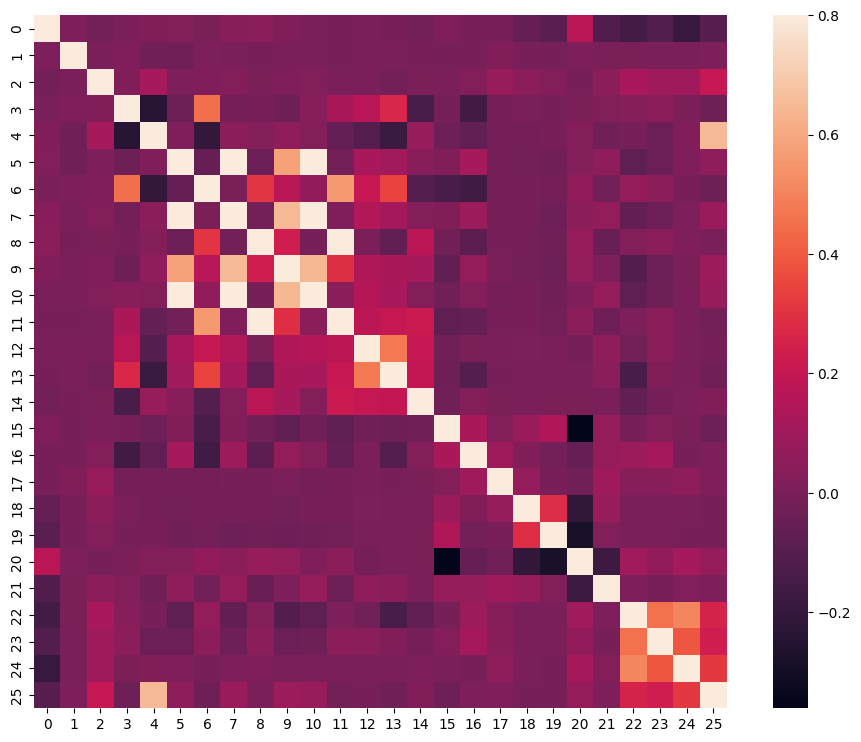

In [20]:
#correlation matrix
corrmat = ddf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Here, the Dask DataFrame (ddf) is computed using the dd.compute() function, and the result is assigned back to ddf. The seaborn style is set to "whitegrid" for aesthetic purposes in data visualization. <br>
Then we generate a bar plot to display the distribution of flights across different months.

In [21]:
ddf = dd.compute(ddf)[0]

sns.set(style="whitegrid")

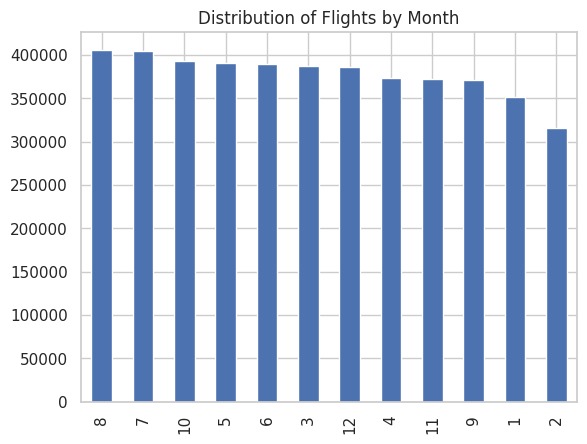

In [22]:
ddf['MONTH'].value_counts().plot(kind='bar', title='Distribution of Flights by Month')
plt.show()

This code utilizes Seaborn to create a count plot, illustrating the distribution of flights for each day of the week.

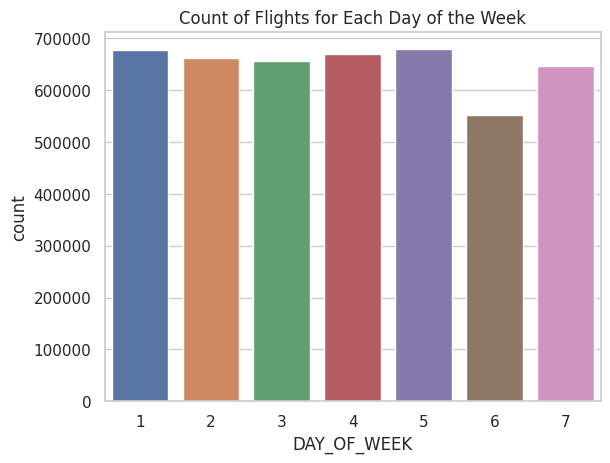

In [23]:
sns.countplot(x='DAY_OF_WEEK', data=ddf)
plt.title('Count of Flights for Each Day of the Week')
plt.show()

This code generates a count plot using Seaborn to illustrate the distribution of flights based on the 'DEP_DEL15' column in the Dask DataFrame (ddf)

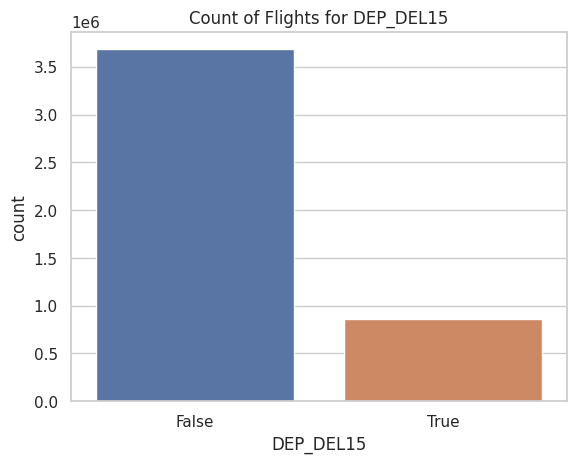

In [24]:
sns.countplot(x='DEP_DEL15', data=ddf)
plt.title('Count of Flights for DEP_DEL15')
plt.show()


In this section, a scatter plot is created using Seaborn to visualize the relationship between 'PLANE_AGE' and 'FLT_ATTENDANTS_PER_PASS' columns

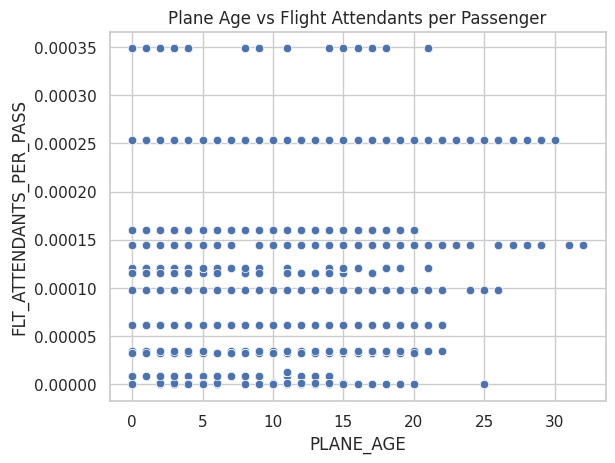

In [25]:
sns.scatterplot(x='PLANE_AGE', y='FLT_ATTENDANTS_PER_PASS', data=ddf)
plt.title('Plane Age vs Flight Attendants per Passenger')
plt.show()


Here, a box plot is created using Seaborn to display the distribution of 'PLANE_AGE' for each 'CARRIER_NAME'

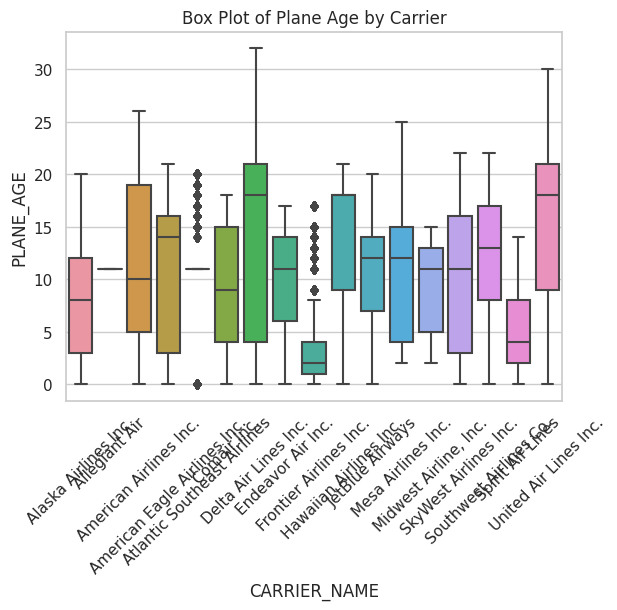

In [26]:
sns.boxplot(x='CARRIER_NAME', y='PLANE_AGE', data=ddf)
plt.title('Box Plot of Plane Age by Carrier')
plt.xticks(rotation=45)
plt.show()


This code generates a heatmap to visualize the correlation matrix of numerical columns

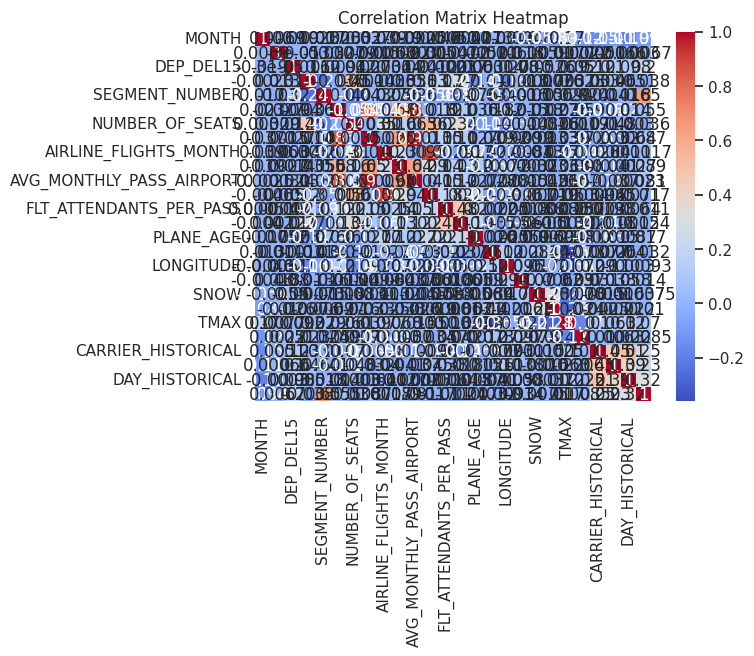

In [27]:
correlation_matrix = ddf.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


This code generates a scatter plot to visualize the geospatial distribution of flights based on the 'LONGITUDE' and 'LATITUDE'

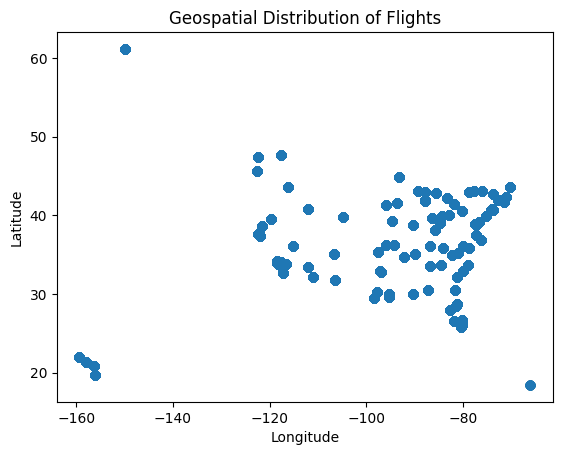

In [23]:
plt.scatter(ddf['LONGITUDE'].compute(), ddf['LATITUDE'].compute())
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Flights')
plt.show()

This code creates a stacked bar plot using Seaborn to illustrate the count of departure delays ('DEP_DEL15') for each month.

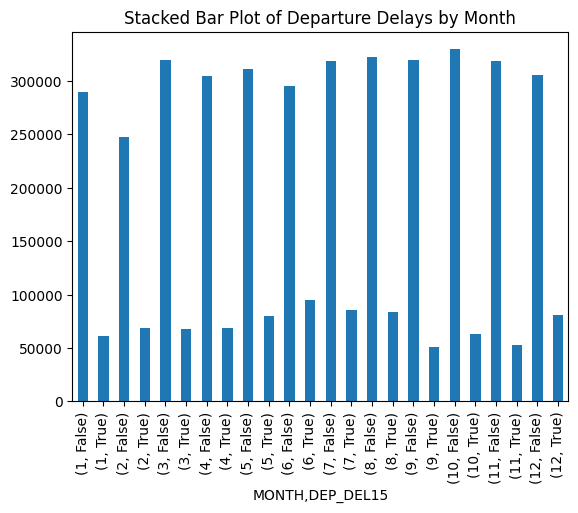

In [22]:
ddf.groupby(['MONTH', 'DEP_DEL15']).size().compute().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Departure Delays by Month')
plt.show()

## Asking and Answering Questions

In the realm of data analysis and exploration, our project embarks on a journey to unravel insights from a substantial dataset using the powerful combination of Python's Pandas, Numpy, and Matplotlib/Seaborn libraries. The dataset, residing in a Dask DataFrame, demands meticulous examination to extract meaningful patterns and trends.


#### Q1: Which carrier has the best and worst average departure delays?

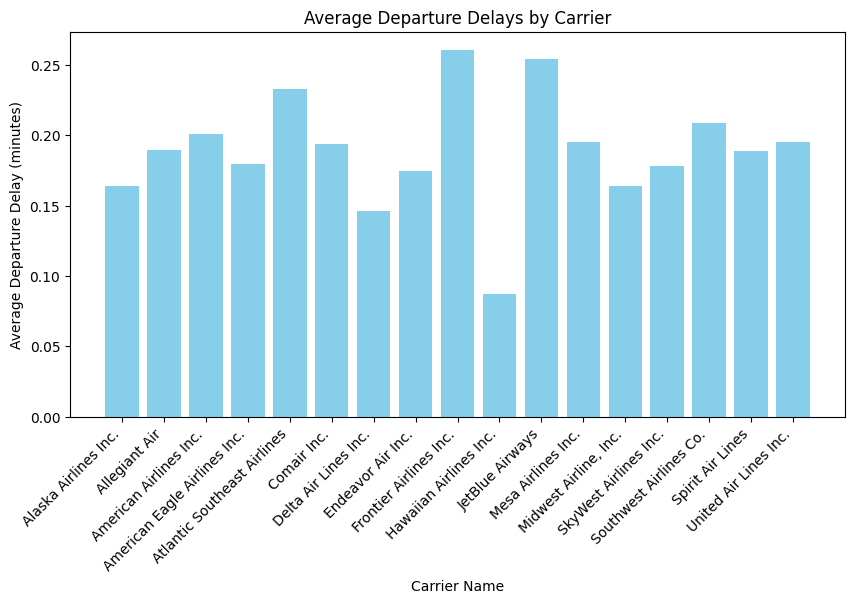

The carrier with the best average departure delay is: Hawaiian Airlines Inc. (0.09 minutes)
The carrier with the worst average departure delay is: Frontier Airlines Inc. (0.26 minutes)


In [40]:
carrier_avg_delays = ddf.groupby('CARRIER_NAME')['DEP_DEL15'].mean().compute().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(carrier_avg_delays['CARRIER_NAME'], carrier_avg_delays['DEP_DEL15'], color='skyblue')
plt.title('Average Departure Delays by Carrier')
plt.xlabel('Carrier Name')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

best_carrier = carrier_avg_delays.loc[carrier_avg_delays['DEP_DEL15'].idxmin()]
worst_carrier = carrier_avg_delays.loc[carrier_avg_delays['DEP_DEL15'].idxmax()]

print(f"The carrier with the best average departure delay is: {best_carrier['CARRIER_NAME']} ({best_carrier['DEP_DEL15']:.2f} minutes)")
print(f"The carrier with the worst average departure delay is: {worst_carrier['CARRIER_NAME']} ({worst_carrier['DEP_DEL15']:.2f} minutes)")

#### Q2: Are there specific months or days of the week with higher average departure delays?

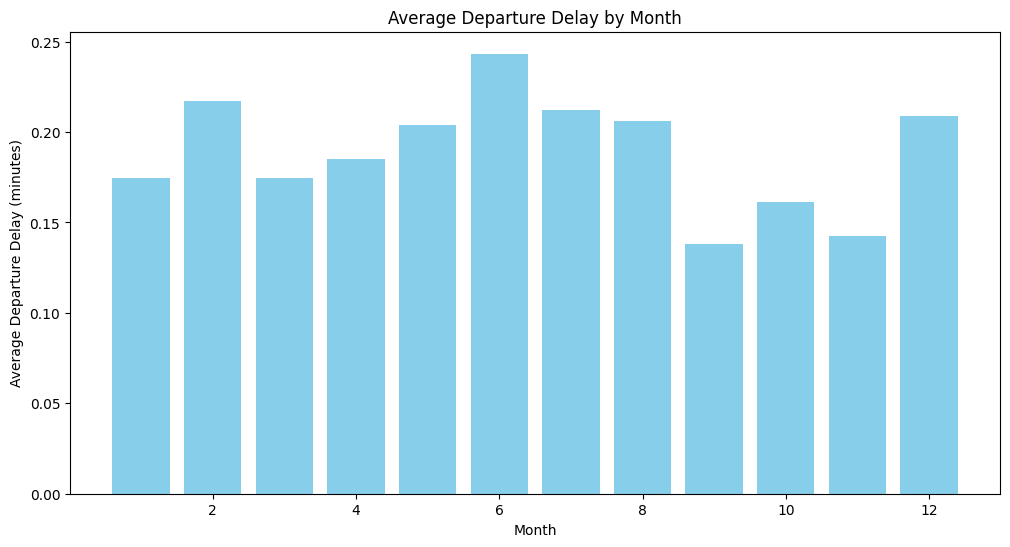

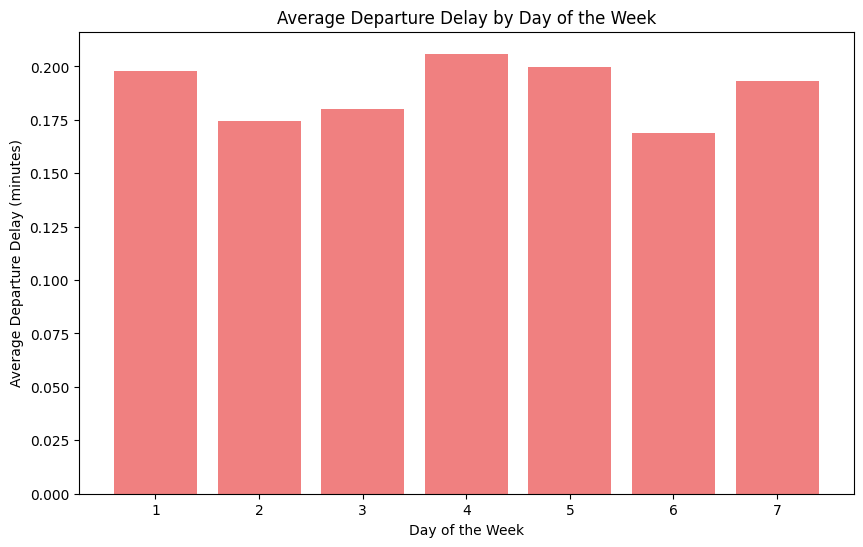

In [15]:
average_delay_by_month = ddf.groupby('MONTH')['DEP_DEL15'].mean().reset_index()


average_delay_by_day = ddf.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.bar(average_delay_by_month['MONTH'], average_delay_by_month['DEP_DEL15'], color='skyblue')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(average_delay_by_day['DAY_OF_WEEK'], average_delay_by_day['DEP_DEL15'], color='lightcoral')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

#### Q3: How does aircraft size (number of seats) relate to delays or other operational factors?

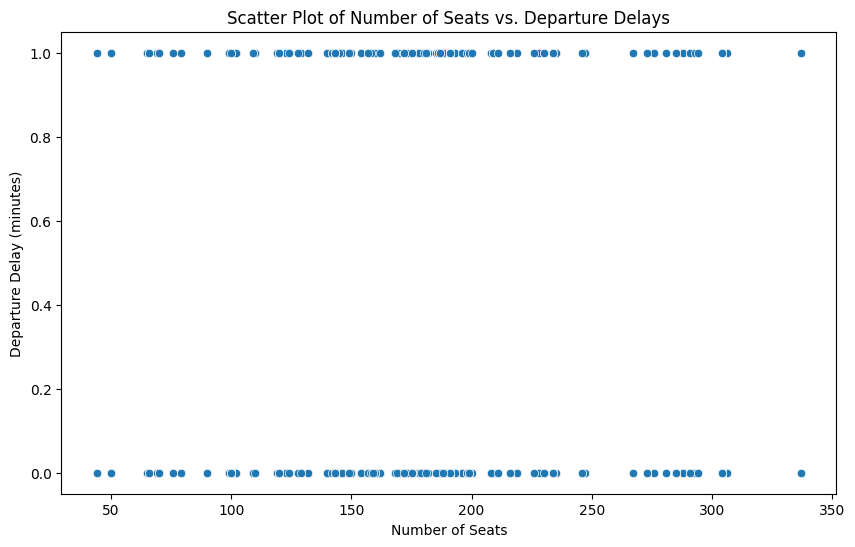

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NUMBER_OF_SEATS', y='DEP_DEL15', data=ddf)
plt.title('Scatter Plot of Number of Seats vs. Departure Delays')
plt.xlabel('Number of Seats')
plt.ylabel('Departure Delay (minutes)')
plt.show()

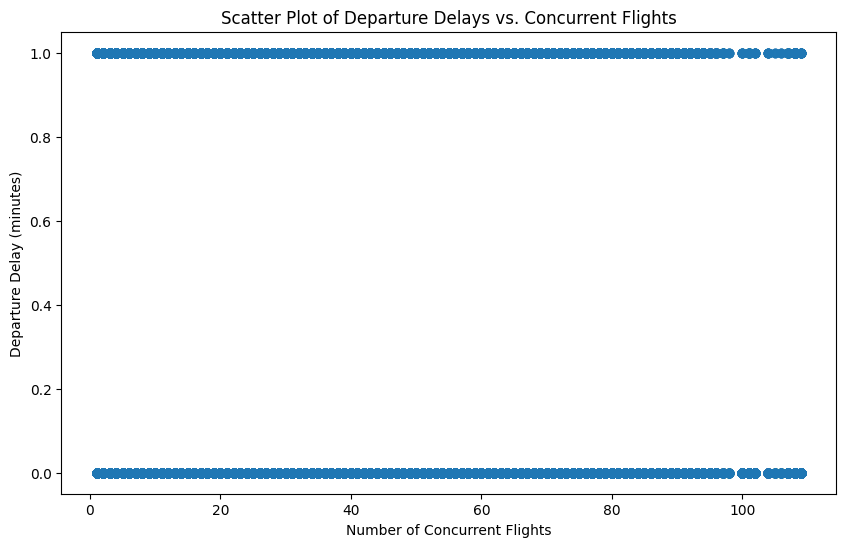

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(ddf['CONCURRENT_FLIGHTS'], ddf['DEP_DEL15'], alpha=0.5)
plt.title('Scatter Plot of Departure Delays vs. Concurrent Flights')
plt.xlabel('Number of Concurrent Flights')
plt.ylabel('Departure Delay (minutes)')
plt.show()

#### Q4: Which airline carrier consistently experiences the highest number of delays across its flights?

In [35]:
Carrier_count = ddf['CARRIER_NAME'].value_counts().compute().rename_axis('CARRIER_NAME').reset_index(name='count')
Carrier_count

,CARRIER_NAME,count
0,Southwest Airlines Co.,907076
1,Delta Air Lines Inc.,657062
2,American Airlines Inc.,632771
3,United Air Lines Inc.,420624
4,SkyWest Airlines Inc.,409126
5,"Midwest Airline, Inc.",210298
6,JetBlue Airways,188402
7,Alaska Airlines Inc.,167595
8,American Eagle Airlines Inc.,160390
9,Comair Inc.,153365


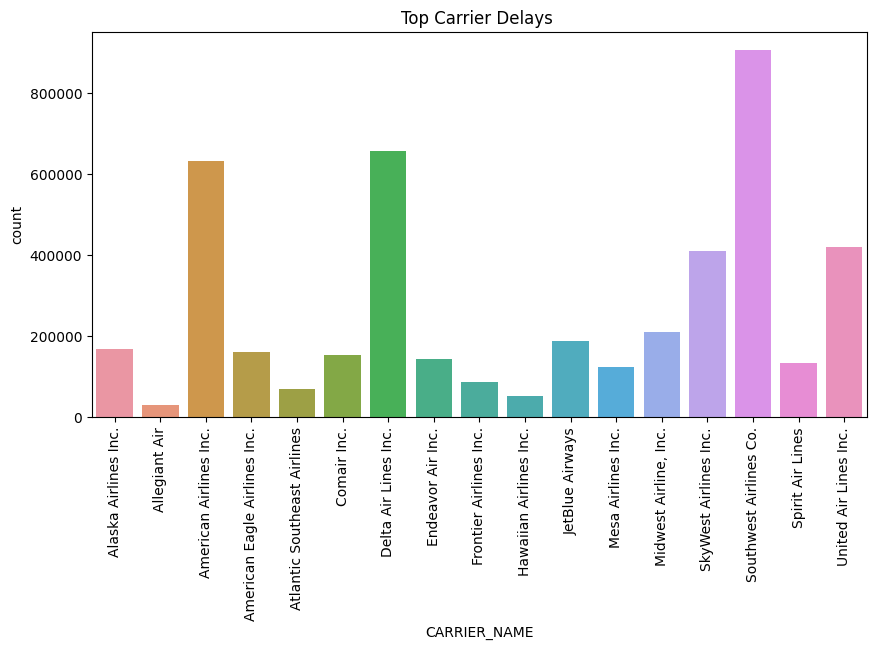

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='CARRIER_NAME', y='count',data=Carrier_count).set(title="Top Carrier Delays ")
plt.xticks(rotation='vertical')
plt.show()

#### Q5: Which Airline has the most number of domestic flights(less seats or smaller size of plane) ?

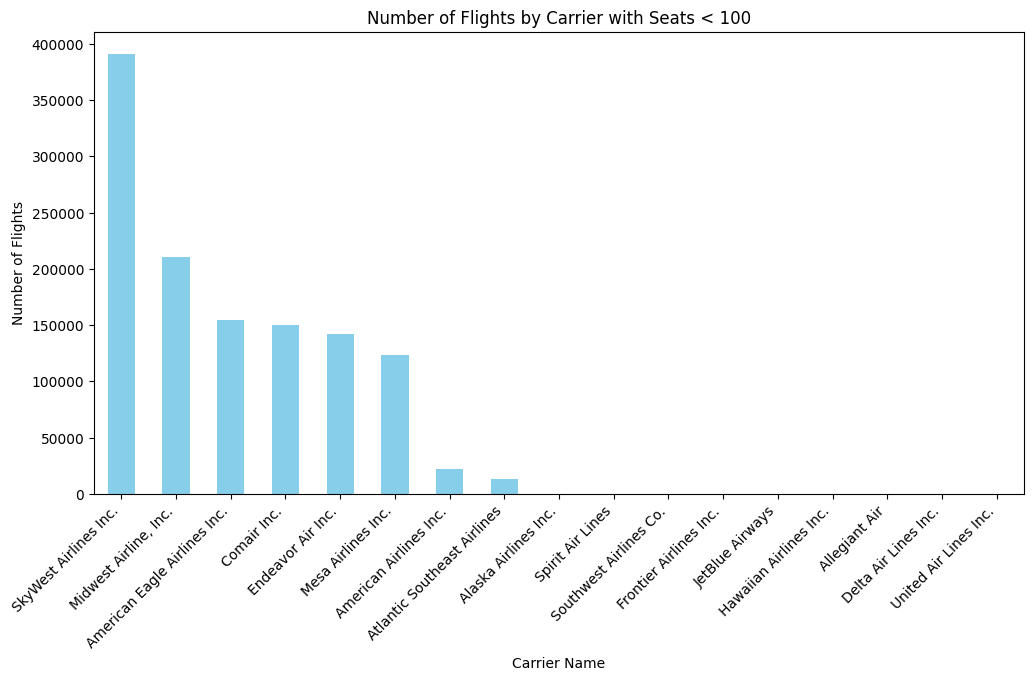

In [37]:
filtered_df = ddf[ddf['NUMBER_OF_SEATS'] < 100].compute()

# Create a bar chart
plt.figure(figsize=(12, 6))
carrier_count = filtered_df['CARRIER_NAME'].value_counts()
carrier_count.plot(kind='bar', color='skyblue')
plt.title('Number of Flights by Carrier with Seats < 100')
plt.xlabel('Carrier Name')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()

## Pros and Cons


### Pros:

- **Scalability:** Dask enables parallel and distributed computing, making it suitable for handling large datasets that do not fit into memory. It can scale from a single machine to a cluster of machines.

- **Familiar API:** Dask provides an API that is similar to pandas, making it easy for users familiar with pandas to transition to Dask seamlessly. This makes it a convenient choice for scaling up existing pandas workflows.

- **Interoperability:** Dask can integrate with other libraries and technologies in the Python ecosystem, such as NumPy, pandas, and scikit-learn. This allows users to leverage Dask's capabilities within their existing workflows.

- **Lazy Evaluation:** Dask uses lazy evaluation, meaning that it builds up a task graph representing the computation before actually executing it. This allows for optimized execution plans and efficient use of resources.

- **Parallel Processing:** Dask efficiently parallelizes computations, utilizing multicore processors for improved performance on a single machine.


### Cons:

- **Learning Curve:** While the API is similar to pandas, there is still a learning curve associated with understanding Dask's parallel computing concepts and best practices.

- **Limited Functionality:** Dask may not support all pandas functionalities, and some operations might not be as performant as their pandas equivalents. Users might need to be mindful of the specific features supported in Dask.

- **Debugging Complexity:** Debugging lazy computations can be challenging since the error might not manifest until the computation is actually executed. This can make it more difficult to trace and fix issues.

- **Cluster Configuration:** Setting up and configuring Dask to run on a cluster of machines may require additional effort and expertise, especially for users new to distributed computing.

## Conclusion



In summary, the project showcase the utilization of Dask for distributed computing and parallelization in a Python environment. Dask is employed for handling large datasets, performing computations, and exploring data in a scalable manner. Various operations, including data cleaning, type conversion, and visualization, are seamlessly integrated with Dask, allowing for efficient manipulation and analysis of sizable datasets. The flexibility and parallel processing capabilities of Dask make it a valuable tool for tasks involving big data and complex computations.

## References

> Dask — Dask documentation. (2021). Dask.org. https://docs.dask.org/en/stable/

> Dask Tutorial. (2023, December 20). GitHub. https://github.com/dask/dask-tutorial

> Varshney, P. (2020, October 16). DASK: A Guide to Process Large Datasets using Parallelization. Medium. https://towardsdatascience.com/dask-a-guide-to-process-large-datasets-using-parallelization-c5554889abdb#:~:text=Dask%20helps%20in%20doing%20data


